# Combined Weather and Cycling Data

This notebook combines the weather and cycling data for a year and produces plots for publications.

In [1]:
year = 2017

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

import papermill as pm

## Load Data From Previous Steps

In [3]:
bikes = pm.read_notebook('output/30-bikes-ECO09113499-%i.ipynb' % year)
weather = pm.read_notebook('output/30-weather-%i.ipynb' % year)

In [4]:
df_bike = pd.DataFrame.from_items((('date', bikes.data['index']),
                                  ('average', bikes.data['average']['total']),
                                  ('total', bikes.data['sum']['total'])))

df_weather = pd.DataFrame.from_items((('date', weather.data['index']),
                                      ('rain', weather.data['rain']),
                                      ('temp', weather.data['temp'])
                                     )
                                    )

In [5]:
df_bike['date'] = pd.to_datetime(df_bike.date, dayfirst=True)
df_bike = df_bike.set_index('date')

In [6]:
df_weather['date'] = pd.to_datetime(df_weather.date, dayfirst=True)
df_weather = df_weather.set_index('date')

# Plotting

## Total Bike Riders

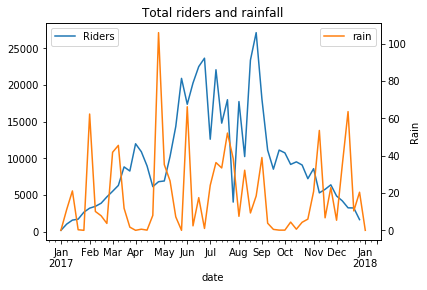

In [7]:
ax = df_bike.total.plot(label='Riders')
ax2 = df_weather.rain.plot(ax=ax, secondary_y=True)
ax2.set_ylabel("Rain")
plt.title("Total riders and rainfall")
ax.legend(loc=2)
ax2.legend(loc=1);

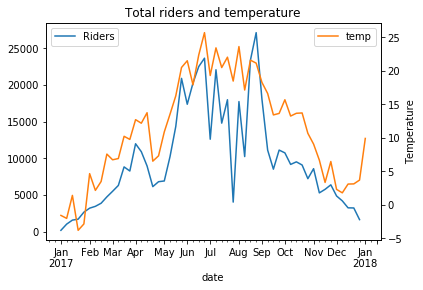

In [8]:
ax = df_bike.total.plot(label='Riders')
ax2 = df_weather.temp.plot(ax=ax, secondary_y=True)
ax2.set_ylabel("Temperature")
plt.title("Total riders and temperature")
ax.legend(loc=2)
ax2.legend(loc=1);

## Average bike riders

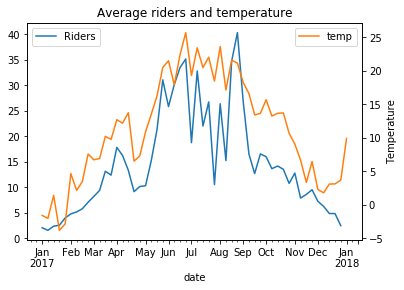

In [9]:
ax = df_bike.average.plot(label='Riders')
ax2 = df_weather.temp.plot(ax=ax, secondary_y=True)
ax2.set_ylabel("Temperature")
plt.title("Average riders and temperature")
ax.legend(loc=2)
ax2.legend(loc=1);

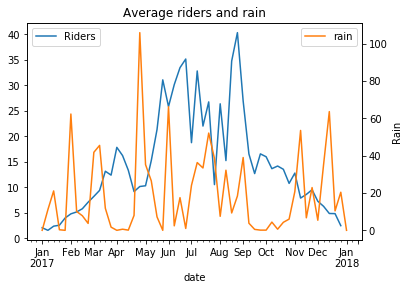

In [10]:
ax = df_bike.average.plot(label='Riders')
ax2 = df_weather.rain.plot(ax=ax, secondary_y=True)
ax2.set_ylabel("Rain")
plt.title("Average riders and rain")
ax.legend(loc=2)
ax2.legend(loc=1);